# Project for Pacmann Probability Course

## Import Libs

In [318]:
import matplotlib
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import matplotlib.font_manager as font_manager
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from math import factorial, sqrt
from functuser import *
from numerize.numerize import numerize
import scipy.stats as stats

# customise matplotlib chart
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.titlesize'] = 20 # title
rcParams['axes.labelsize'] = 14 # label
rcParams['figure.titleweight'] = 'bold' #suptitle
rcParams['figure.titlesize'] = 20 
# ticks size must be set manually 

## Import Font & Set Styles for Graphs

In [319]:
# import ROBOTO
load_roboto_var()

# set style
seaborn = 'seaborn-white'
mpl = 'fivethirtyeight'

# color palette
male_cat = '#a2d2ff'
female_cat = '#ffc8dd'
hist_sn = '#bde0fe'
dist_sn = '#e63946' 
bmiL25_cat ='#8ac926'
bmiM25_cat = '#ff595e'
smoker_cat = '#6930c3'
nosmoker_cat = '#72efdd'
density_red = '#e63946'
distribution_blue = '#bde0fe'

# dictionary palette
sex_pal = {"female": female_cat, "male": male_cat}
region_pal = {
    'northeast': '#4ecdc4',
    'northwest': '#f7fff7', 
    'southeast': '#ff6b6b', 
    'southwest': '#ffe66d'}

# Highlight
minMax = 'coolwarm'
corrMatrix = 'RdBu'

## Import Data

In [320]:
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check Outliers: bmi & charges columns

### bmi outliers
ref: https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

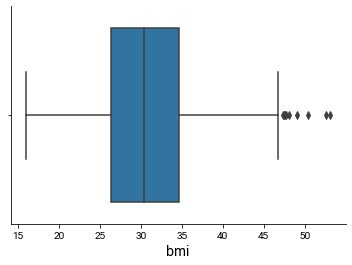

In [321]:
sns.boxplot(
    data=data,
    x='bmi');

In [322]:
ddf = df_without_outlier(data, 'bmi')
ddf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [323]:
insurance_data = ddf.copy()

# bmi table
bmi_status = []
for index, row in insurance_data.iterrows():
    bmi_status.append(bmi_category(row['bmi']))

insurance_data['bmi_status'] = bmi_status
insurance_data

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obesity
1334,18,female,31.920,0,no,northeast,2205.98080,obesity
1335,18,female,36.850,0,no,southeast,1629.83350,obesity
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


## Descriptive Statistics Analysis

### Customer Segment by Age

In [324]:
# Mean
age_mean = insurance_data['age'].mean()
print_format(age_mean, 2)

39.20


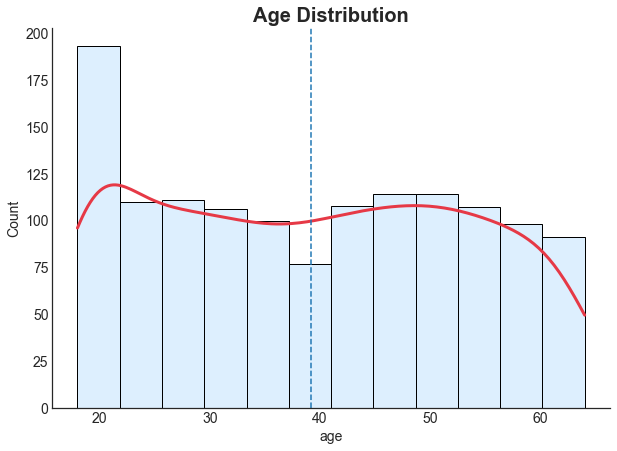

In [325]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    sns.histplot(
        ax=ax, 
        data=insurance_data, 
        x='age', 
        color=distribution_blue, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'})

    ax.lines[0].set_color(density_red)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    ax.axvline(x=insurance_data['age'].mean(), linestyle='--')
    ax.set_title("Age Distribution", fontsize=20, fontweight="bold")

    plt.show();

### Smoker Age by Sex

In [326]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

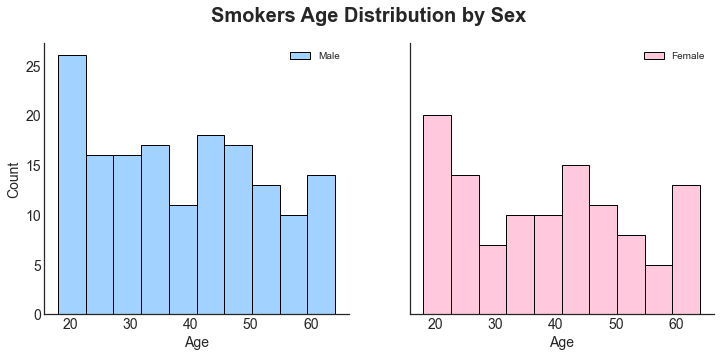

In [327]:
with plt.style.context(seaborn): # set temporary style
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True,sharex=True)

    ax1.hist(
        male_smoker['age'], 
        edgecolor='black', 
        color=male_cat, 
        label='Male')
    ax2.hist(
        female_smoker['age'], 
        edgecolor='black', 
        color=female_cat, 
        label='Female')

    ax1.grid(visible=False)
    ax2.grid(visible=False)

    plt.suptitle("Smokers Age Distribution by Sex", fontsize=20)

    ax1.set(xlabel='Age', ylabel='Count')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    
    ax2.set(xlabel='Age')
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)

    
    ax1.legend()
    ax2.legend()
    plt.show();

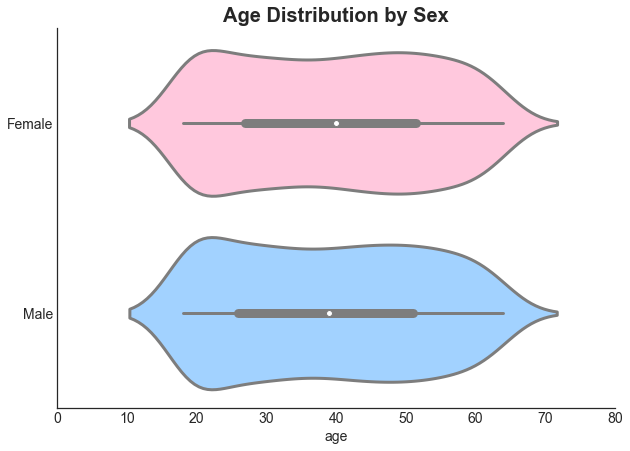

In [328]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))

    sns.violinplot(
        ax=ax, 
        x='age', 
        y='sex', 
        data=insurance_data, 
        palette=sex_pal, 
        saturation=1, 
        linewidth=3)
        
    ax.set_title('Age Distribution by Sex', size=20, weight="bold")
    ax.set_yticklabels(['Female', 'Male'])
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    ax.set_xlim(0, 80)
    ax.set(ylabel=None)
    plt.show();

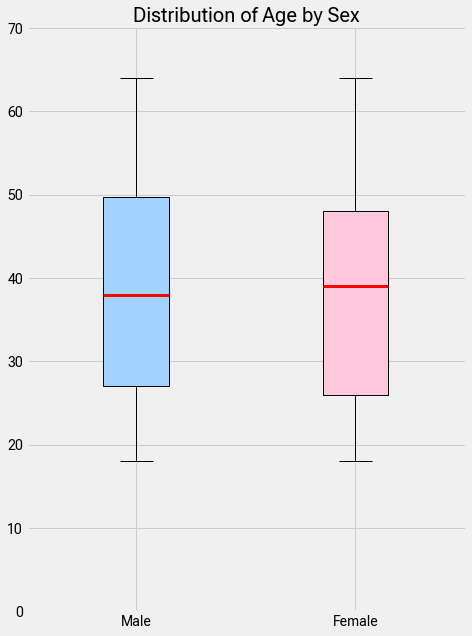

In [329]:
male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']
labels = ['Male', 'Female']  
data = [male_smoker['age'], female_smoker['age']]

with plt.style.context(mpl):
    fig, ax = plt.subplots(figsize=(7, 10))

    bp = ax.boxplot(
        data, 
        vert=True, 
        patch_artist=True, 
        widths = 0.3)

    ax.grid(visible=True)
    ax.set_xticklabels(['Male', 'Female']) 
    ax.set_ylim(0, 70)
    ax.set_title('Distribution of Age by Sex', fontsize=20)

    # set box colours
    colors = [male_cat, female_cat] 
    for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
    
    # changing colours and linewidth of medians 
    for median in bp['medians']: median.set(color ='red', linewidth = 3) 


### BMI Distribution

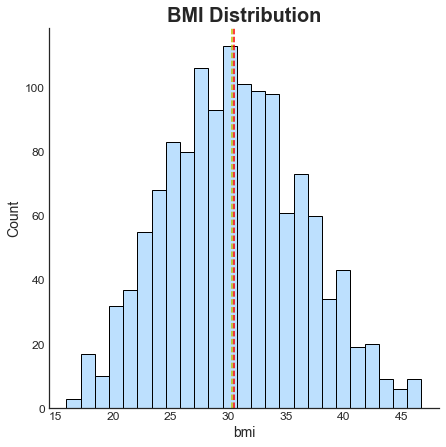

In [330]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.histplot(
        ax=ax,
        data=insurance_data,
        x='bmi',
        edgecolor='black',
        facecolor=distribution_blue,
        bins=25
        )

    ax.axvline(insurance_data.bmi.mean(), color='r',linestyle='--')
    ax.axvline(insurance_data.bmi.median(), color='y',linestyle='--')
    
    ax.set_title("BMI Distribution", fontsize=20)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    plt.show();

#### Smoker BMI Mean & Median & Mode 

In [331]:
smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
    
print_format(smokerBMI_mean, 3)

30.504


In [332]:
smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not
    
print_format(smokerBMI_median, 3)

30.360


In [333]:
smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'yes']
    )['bmi']
    ).agg(pd.Series.mode)[0]
    
print_format(smokerBMI_mode, 3)

28.310


#### Non-smoker BMI Mean & Median & Mode

In [334]:
no_smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
    
print_format(no_smokerBMI_mean, 3)

30.546


In [335]:
no_smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not
    
print_format(no_smokerBMI_median, 3)

30.300


In [336]:
no_smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'no']
    )['bmi']
    ).agg(pd.Series.mode)[0]
    
print_format(smokerBMI_mode, 3)

28.310


In [337]:
bmi_stats = pd.DataFrame(
    {
    'Mean': [smokerBMI_mean, no_smokerBMI_mean],
    'Median': [smokerBMI_median, no_smokerBMI_mean],
    'Mode': [smokerBMI_mode, no_smokerBMI_mode],
    }, index=['Smoker', 'Non-Smoker'])

bmi_stats = bmi_stats\
    .style\
        .background_gradient(cmap=minMax)\
        .set_properties(**{'font-size': '20px'})

bmi_stats

,Mean,Median,Mode
Smoker,30.503782,30.360000,28.310000
Non-Smoker,30.545945,30.545945,32.300000


### Variance of Charges

#### Smoker

In [338]:
# variance
smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'yes']
    ['charges']
    .var()
    )
    
print(numerize(smoker_charges_var))

129.61M


In [339]:
# std
print(numerize(sqrt(smoker_charges_var)))

11.38K


#### Non-smoker Variance

In [340]:
# variance
non_smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'no']
    ['charges']
    .var()
)

print(numerize(non_smoker_charges_var))

36.03M


In [341]:
# std
print(numerize(sqrt(non_smoker_charges_var)))

6K


In [342]:
charges_variance_stats = pd.DataFrame(
    {
    'Variance': [numerize(smoker_charges_var), numerize(non_smoker_charges_var)],
    'Standard Deviation': [numerize(sqrt(smoker_charges_var)), numerize(sqrt(non_smoker_charges_var))]
    }, index=['Smoker', 'Non-Smoker'])

charges_variance_stats

,Variance,Standard Deviation
Smoker,129.61M,11.38K
Non-Smoker,36.03M,6K


### Charges by Sex, Smoker, and Age 

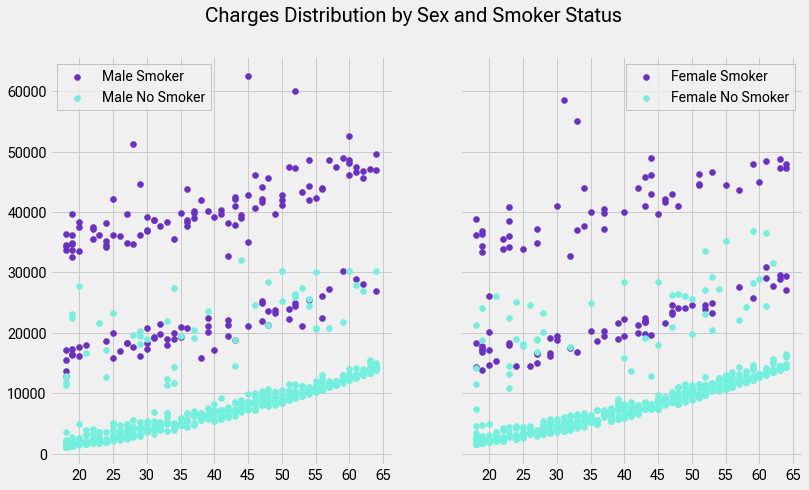

In [343]:
# male and female smoker are already present
# get non smokers category by sex
male_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'male')]

female_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'female')]

with plt.style.context(mpl):  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker['age'], 
        male_smoker['charges'], 
        c=smoker_cat, 
        label='Male Smoker')
    ax2.scatter(
        female_smoker['age'], 
        female_smoker['charges'], 
        c=smoker_cat, 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker['age'], 
        male_no_smoker['charges'], 
        c=nosmoker_cat, 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker['age'], 
        female_no_smoker['charges'], 
        c=nosmoker_cat, 
        label='Female No Smoker')

    ax1.legend(fontsize='medium', edgecolor='gray', fancybox=False)
    ax2.legend(fontsize='medium', edgecolor='gray', fancybox=False)

    plt.suptitle("Charges Distribution by Sex and Smoker Status")

    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

### Charges by BMI and Sex for Age > 25

In [344]:
male_smoker_bmi25 = male_smoker.loc[male_smoker['bmi'] > 25]
male_no_smoker_bmi25 = male_no_smoker.loc[male_no_smoker['bmi'] > 25]
female_no_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]
female_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]

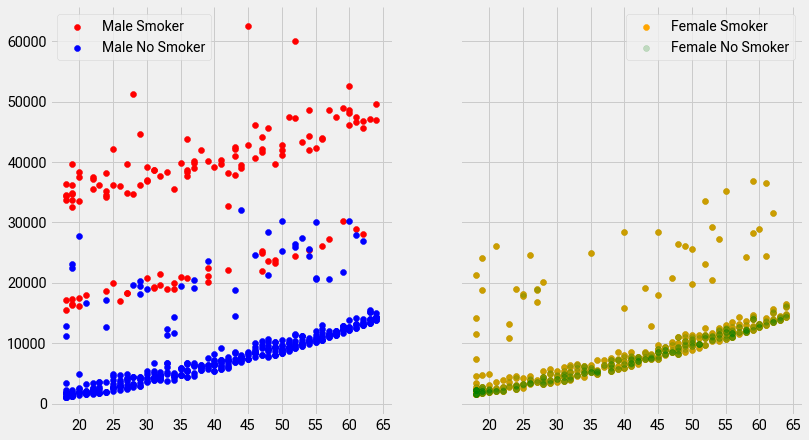

In [345]:
with plt.style.context(mpl): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_bmi25['age'],
         male_smoker_bmi25['charges'], 
         c='red', 
         label='Male Smoker')
    ax2.scatter(
        female_smoker_bmi25['age'], 
        female_smoker_bmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker_bmi25['age'], 
        male_no_smoker_bmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker_bmi25['age'], 
        female_no_smoker_bmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

### Charges by BMI and Sex for Age < 25

In [346]:
male_smoker_lbmi25 = male_smoker.loc[male_smoker['bmi'] < 25]
male_no_smoker_lbmi25 = male_no_smoker.loc[male_no_smoker['bmi'] < 25]
female_no_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]
female_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]

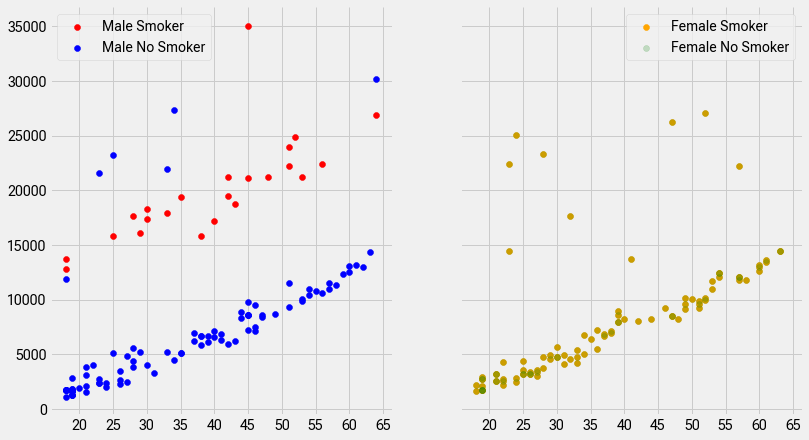

In [347]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_lbmi25['age'], 
        male_smoker_lbmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax2.scatter(
        female_smoker_lbmi25['age'], 
        female_smoker_lbmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker_lbmi25['age'], 
        male_no_smoker_lbmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker_lbmi25['age'], 
        female_no_smoker_lbmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

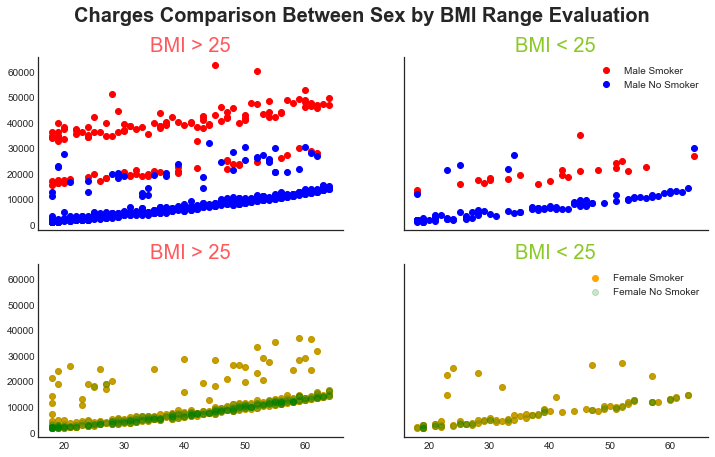

In [348]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2,  figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_bmi25['age'], 
        male_smoker_bmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax1.scatter(
        male_no_smoker_bmi25['age'], 
        male_no_smoker_bmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        male_smoker_lbmi25['age'], 
        male_smoker_lbmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax2.scatter(
        male_no_smoker_lbmi25['age'], 
        male_no_smoker_lbmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax3.scatter(
        female_smoker_bmi25['age'], 
        female_smoker_bmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax3.scatter(
        female_no_smoker_bmi25['age'], 
        female_no_smoker_bmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)
    ax4.scatter(
        female_smoker_lbmi25['age'], 
        female_smoker_lbmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax4.scatter(
        female_no_smoker_lbmi25['age'], 
        female_no_smoker_lbmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)
    
    plt.suptitle('Charges Comparison Between Sex by BMI Range Evaluation')

    ax1.set_title('BMI > 25', color=bmiM25_cat)
    ax2.set_title('BMI < 25', color=bmiL25_cat)
    ax3.set_title('BMI > 25', color=bmiM25_cat)
    ax4.set_title('BMI < 25', color=bmiL25_cat)

    ax2.legend()
    ax4.legend()
    plt.show();

### Comparing BMI by Sex

In [349]:
male1 = insurance_data.loc[insurance_data['sex'] == 'male']
female1 = insurance_data.loc[insurance_data['sex'] == 'female']

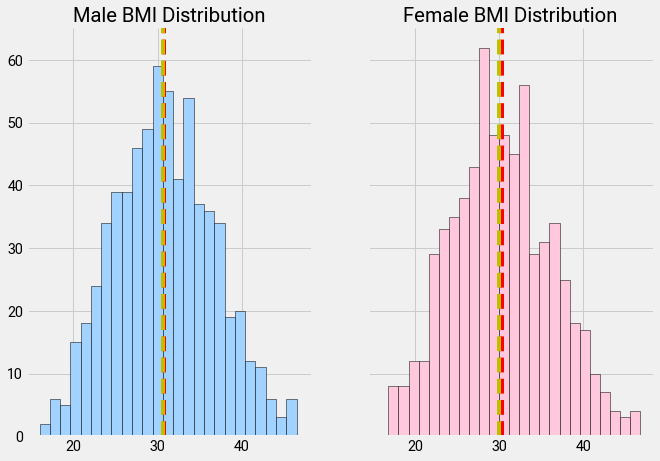

In [350]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True, sharey=True)
    
    ax1.hist(
        male1['bmi'], 
        edgecolor='black',
        color=male_cat,
        bins=25)
        
    ax1.axvline(male1['bmi'].mean(), c='r', linestyle='--', label='BMI of Male Mean')
    ax1.axvline(male1['bmi'].median(), c='y', linestyle='--', label='BMI of Male Median')

    ax2.hist(
        female1['bmi'], 
        edgecolor='black',
        color=female_cat,
        bins=25)
    
    ax2.axvline(female1['bmi'].mean(), c='r', linestyle='--', label='BMI of Female Mean')
    ax2.axvline(female1['bmi'].median(), c='y', linestyle='--', label='BMI of Female Median')

    ax1.set(title='Male BMI Distribution')
    ax2.set(title='Female BMI Distribution')

    plt.show();

### Comparing BMI by Smoker Status

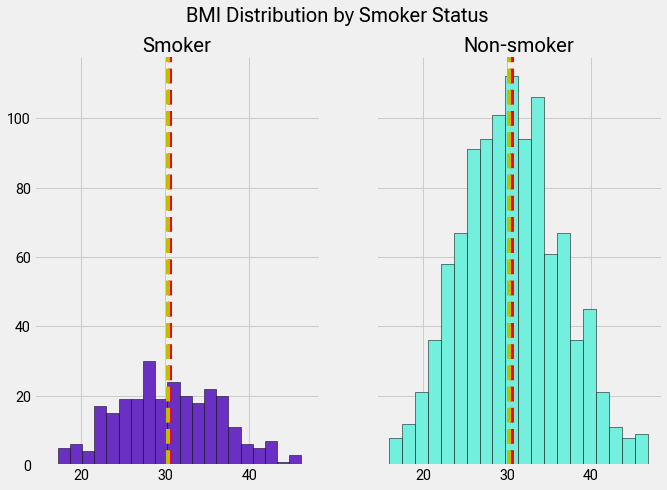

In [351]:
bmi_smoker = insurance_data[insurance_data['smoker'] == 'yes']  
bmi_no_smoker = insurance_data[insurance_data['smoker'] == 'no']

with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharey=True,sharex=True)

    ax1.hist(
        bmi_smoker['bmi'], 
        edgecolor='black',
        color=smoker_cat,
        bins=20)

    ax1.axvline(bmi_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Smoker Mean')
    ax1.axvline(bmi_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Smoker Median')

    ax2.hist(
        bmi_no_smoker['bmi'], 
        edgecolor='black',
        color=nosmoker_cat,
        bins=20)

    ax2.axvline(bmi_no_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Non-smoker Mean')
    ax2.axvline(bmi_no_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Non-smoker Median')

    ax1.grid(visible=True)
    ax2.grid(visible=True)

    ax1.set(title="Smoker")
    ax2.set(title="Non-smoker")
    plt.suptitle("BMI Distribution by Smoker Status")

    plt.show();

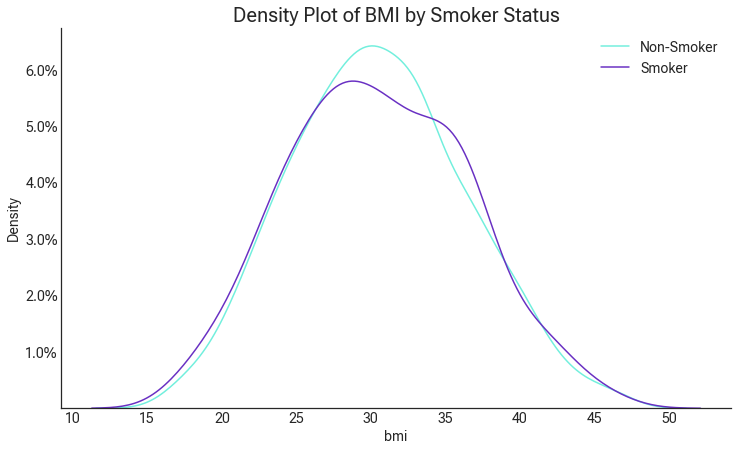

In [352]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.kdeplot(
        ax=ax, 
        data=bmi_no_smoker, 
        x='bmi', 
        color=nosmoker_cat, 
        label='Non-Smoker')
    sns.kdeplot(
        ax=ax, 
        data=bmi_smoker, 
        x='bmi', 
        color=smoker_cat, 
        label='Smoker')

    ax.set_title('Density Plot of BMI by Smoker Status', fontsize=20)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    # Hide 0 on y-axis
    ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

    ax.legend(fontsize=14)


## Categorical Variable Analysis (PMF)

### Top Charges by Sex

In [353]:
top_charges_sex = (insurance_data.groupby(
    ['sex']
    )['charges']
    ).max()\
        .reset_index()
        
top_charges_sex

,sex,charges
0,female,58571.07448
1,male,62592.87309


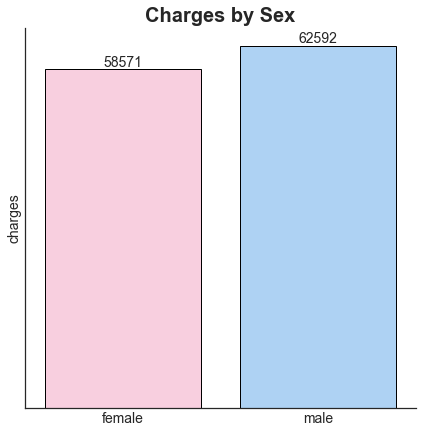

In [354]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    kwargs = {'edgecolor':'black', 'linewidth':1}
    
    sns.barplot(
        ax=ax, 
        data=top_charges_sex, 
        x="sex", 
        y="charges", 
        palette=sex_pal,
        **kwargs)
    ax.set_title('Charges by Sex')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks
    
    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    plt.show();

### Probability Distribution of Charges in Each Region 

In [355]:
# get charges by region
charges_region = (insurance_data.groupby(
    ['region']
    )['charges']
    ).count()\
        .reset_index()

# get probability for each region charges
charges_region['probability'] = charges_region['charges']/charges_region['charges'].sum() 

charges_region

,region,charges,probability
0,northeast,323,0.243040
1,northwest,325,0.244545
2,southeast,357,0.268623
3,southwest,324,0.243792


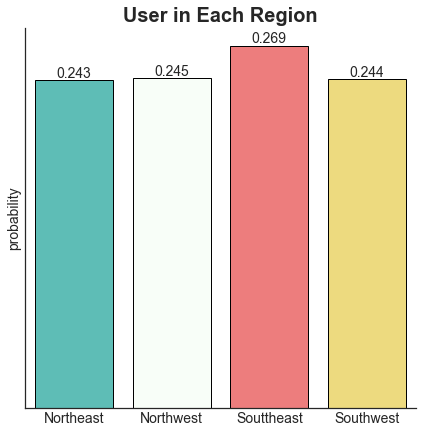

In [356]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    kwargs = {'edgecolor':'black', 'linewidth':1}

    idx = ['Northeast', 'Northwest', 'Souttheast', 'Southwest']

    sns.barplot(
        ax=ax, 
        data=charges_region, 
        x="region", 
        y="probability", 
        palette=region_pal,
        **kwargs
        )
    ax.set_title('User in Each Region')
    ax.set(xlabel=None)
    ax.set_xticklabels(idx)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks
    
    ax.bar_label(ax.containers[0], fontsize=14, fmt='%.3f')

    plt.show();

#### Distribution of Smokers and Non Smokers in each Region

In [357]:
yn_smoker_region = pd.DataFrame(
    insurance_data.groupby(['region', 'smoker'])
    .count()['charges'])

yn_smoker_region['percentage (%)'] = ((yn_smoker_region['charges']*100)/yn_smoker_region['charges'].sum())

yn_smoker_region

charges  percentage (%)
region    smoker                         
northeast no          256       19.262603
          yes          67        5.041384
northwest no          267       20.090293
          yes          58        4.364184
southeast no          268       20.165538
          yes          89        6.696764
southwest no          267       20.090293
          yes          57        4.288939

In [358]:
# prepare data for plotting
region_percent_list = yn_smoker_region['percentage (%)'].to_list()
smoker_region_list = region_percent_list[::2]
no_smoker_region_list = region_percent_list[1::2]
region_labels = ['Northeast', 'Northwest', 'Souttheast', 'Southwest']

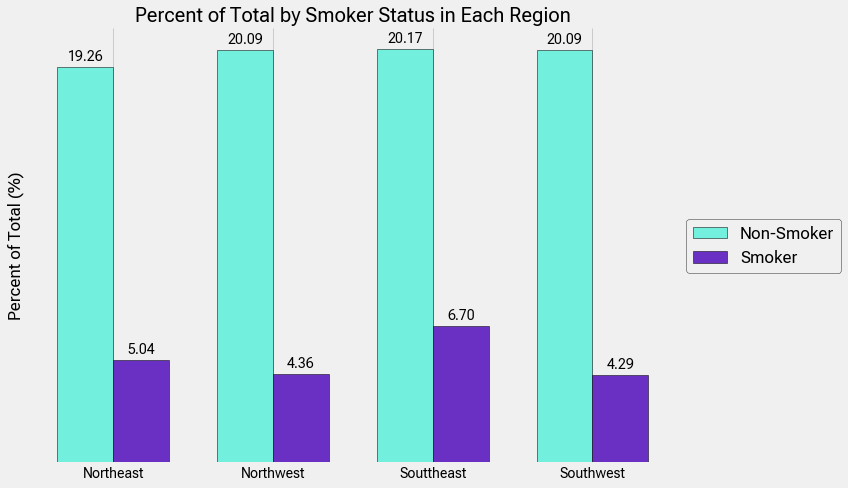

In [359]:
with plt.style.context(mpl):
    x = np.arange(len(region_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(
        x - width/2, 
        smoker_region_list, 
        width, 
        label='Non-Smoker',
        color=nosmoker_cat,
        edgecolor='black')
    rects2 = ax.bar(
        x + width/2, 
        no_smoker_region_list, 
        width, 
        label='Smoker',
        color=smoker_cat,
        edgecolor='black')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent of Total (%)')
    ax.set_title('Percent of Total by Smoker Status in Each Region', fontsize=20)
    ax.set_xticks(x, region_labels)
    ax.yaxis.set_major_locator(plt.NullLocator()) 
    ax.xaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize='large')
    
    ax.bar_label(rects1, padding=3, fontsize=14, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fontsize=14, fmt='%.2f')

    fig.tight_layout()

    plt.show()


<hr>

### Probability of a Smoker is a Female

In [360]:
prob_female = (insurance_data['sex'] == 'female')
prob_male = (insurance_data['sex'] == 'male')
prob_smoker = (insurance_data['smoker'] == 'yes')

In [361]:
female_given_smoker = conditional(prob_female, given=prob_smoker)

print_format(female_given_smoker, 2)

0.42


#### Probability of a Smoker is a Male

In [362]:
male_given_smoker = conditional(prob_male, given=prob_smoker)

print_format(male_given_smoker, 2)

0.58


#### Distribution of Charges in Each Region by Age

In [363]:
southeast_charges = insurance_data.loc[insurance_data['region'] == 'southeast']
southwest_charges = insurance_data.loc[insurance_data['region'] == 'southwest']
northeast_charges = insurance_data.loc[insurance_data['region'] == 'northeast']
northwest_charges = insurance_data.loc[insurance_data['region'] == 'northwest']

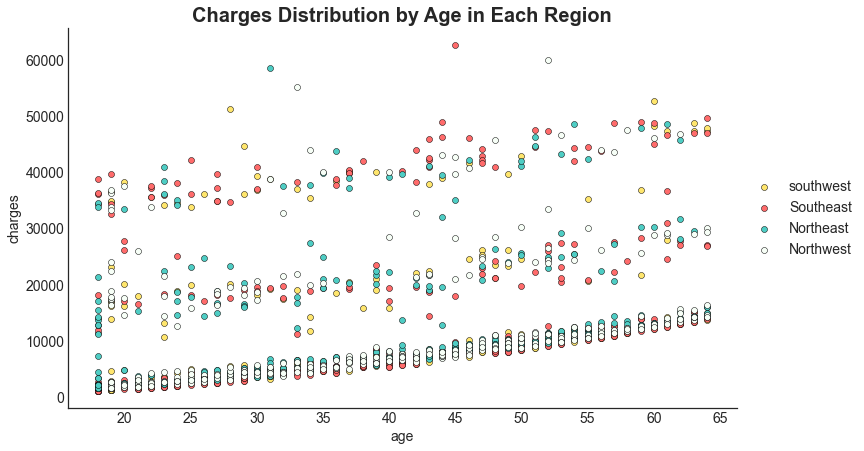

In [364]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.scatterplot(
        ax=ax,
        x=southwest_charges['age'], 
        y=southwest_charges['charges'],
        color=region_pal['southwest'],
        edgecolor="black",
        label='southwest')
    sns.scatterplot(
        ax=ax,
        x=southeast_charges['age'], 
        y=southeast_charges['charges'],
        color=region_pal['southeast'],
        edgecolor="black",
        label='Southeast')
    sns.scatterplot(
        ax=ax,
        x=northeast_charges['age'], 
        y=northeast_charges['charges'],
        color=region_pal['northeast'],
        edgecolor="black",
        label='Northeast')
    sns.scatterplot(
        ax=ax,
        x=northwest_charges['age'], 
        y=northwest_charges['charges'],
        color=region_pal['northwest'],
        edgecolor="black",
        label='Northwest')
        
    ax.set_title('Charges Distribution by Age in Each Region')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize=14)

    tick_spacing = 5
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    plt.show();

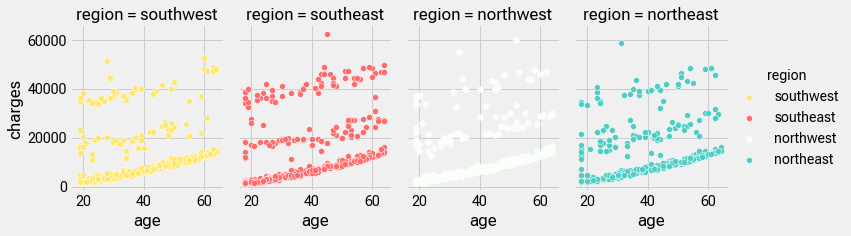

In [365]:
with plt.style.context(mpl):
    grid = sns.FacetGrid(
        insurance_data, 
        col='region', 
        hue='region', 
        col_wrap=4, 
        height=3.5, 
        aspect=.75, 
        palette=region_pal)
    grid.map(sns.scatterplot, 'age', 'charges')
    
    grid.add_legend()

    plt.show();

## Continous Variable Analysis

### Probability of Charge by BMI

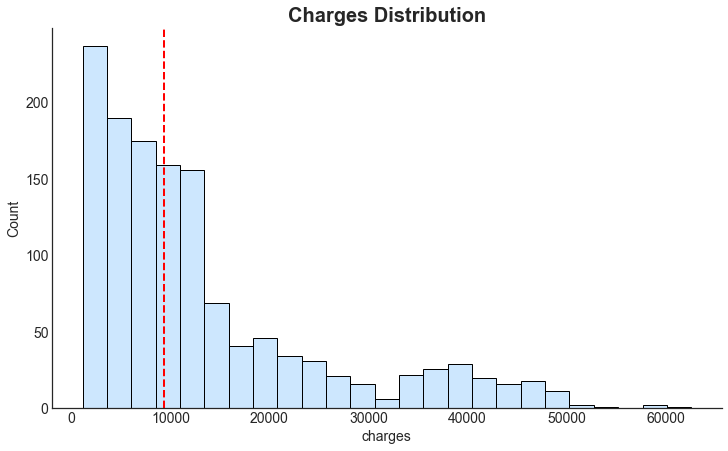

In [366]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.histplot(
        ax=ax,
        data=insurance_data,
        x='charges',
        edgecolor='black',
        bins=25,
        color=distribution_blue)

    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.axvline(insurance_data['charges'].median(), linestyle='--', c='red', linewidth=2)
    
    ax.set_title('Charges Distribution')
    plt.show();

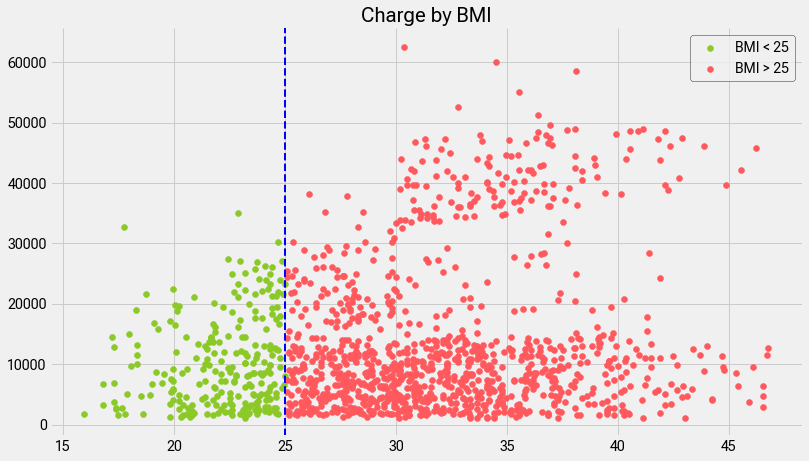

In [367]:
bmi_l25 = insurance_data[insurance_data['bmi'] < 25]
bmi_m25 = insurance_data[insurance_data['bmi'] > 25]

with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.scatter(
        bmi_l25['bmi'], 
        bmi_l25['charges'], 
        c=bmiL25_cat, 
        label='BMI < 25')
    ax.scatter(
        bmi_m25['bmi'], 
        bmi_m25['charges'], 
        c=bmiM25_cat, 
        label='BMI > 25')

    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.axvline(x = 25, color = 'blue', linestyle='--', linewidth=2)
    ax.set_title('Charge by BMI')
    ax.legend(edgecolor='black', fontsize=14)

    plt.show();

### Probability of a Smoker with BMI > 25 Getting Charge > 16,7K

In [368]:
charge16_7 = (insurance_data['charges'] > 16_700)
bmi_m25 = (insurance_data['bmi'] > 25)

In [369]:
smoker_bmi_m25_get_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_m25))

print_format(smoker_bmi_m25_get_charge16_7, 3)

0.981


### Probability of Random Person Getting Charge > 16,7K is a Smoker

In [370]:
charge16_7_is_smoker = conditional(charge16_7, given=prob_smoker)

print_format(charge16_7_is_smoker, 3)

0.926


### COMPARISON 1

#### Probability of a Person with BMI > 25 Getting Charge > 16,7K

In [371]:
bmi_m25_charge16_7 = conditional(charge16_7, given=bmi_m25)

print_format(bmi_m25_charge16_7, 3)

0.259


#### Probability of a Person with BMI < 25 Getting Charge > 16,7K

In [372]:
bmi_l25 = (insurance_data['bmi'] < 25)

In [373]:
bmi_l25_charge16_7 = conditional(charge16_7, given=bmi_l25)

print_format(bmi_l25_charge16_7, 3)

0.208


In [374]:
bmi_charges_comparison = pd.DataFrame(
    {
    'BMI > 25': bmi_m25_charge16_7,
    'BMI < 25': bmi_l25_charge16_7,
    }, index = ['Charged > 16,7K'])

bmi_charges_comparison = (
    bmi_charges_comparison\
        .style\
        .background_gradient(cmap=minMax)
        .set_properties(**{'font-size': '20px'}))

bmi_charges_comparison

,BMI > 25,BMI < 25
"Charged > 16,7K",0.258780,0.208163


Person with BMI > 25 is slighly more likely to get charges > 16,7K

### COMPARISON 2

#### Probability of a Smoker with BMI > 25 Getting Charge > 16,7K

In [375]:
smokerBMI_m25_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_m25))

print_format(smokerBMI_m25_charge16_7, 3)

0.981


#### Probability of a Non-smoker with BMI > 25 Getting Charge > 16,7K

In [376]:
nonSmokerBMI_l25_charge16_7 = conditional(charge16_7, given=(prob_smoker & bmi_l25))

print_format(nonSmokerBMI_l25_charge16_7, 3)

0.709


In [377]:
bmi_smoker_comparison = pd.DataFrame({
    'Smoker BMI > 25': smokerBMI_m25_charge16_7,
    'Non-smoker BMI > 25': nonSmokerBMI_l25_charge16_7,
    }, index = ['Charged > 16,7K'])

bmi_smoker_comparison = (
    bmi_smoker_comparison\
        .style\
        .background_gradient(cmap =minMax)
        .set_properties(**{'font-size': '20px'}))

bmi_smoker_comparison

,Smoker BMI > 25,Non-smoker BMI > 25
"Charged > 16,7K",0.981481,0.709091


### COMPARISON 3

#### Probability of Those with BMI > 25 ARE SMOKER

In [378]:
bmiM25_smoker = conditional(prob_smoker, given=bmi_m25)

print_format(bmiM25_smoker, 3)

0.200


#### Probability of Those with BMI > 25 ARE NON-SMOKER

In [379]:
prob_nonsmoker = (insurance_data['smoker'] == 'no')

In [380]:
bmiM25_nosmoker = conditional(prob_nonsmoker, given=bmi_m25)

print_format(bmiM25_nosmoker, 3)

0.800


#### Probability of Those With BMI < 25 ARE SMOKER

In [381]:
bmiL25_smoker = conditional(prob_smoker, given=bmi_l25)

print_format(bmiL25_smoker, 3)

0.224


#### Probability of Those With BMI < 25 ARE NON-SMOKER

In [382]:
bmiL25_nosmoker = conditional(prob_nonsmoker, given=bmi_l25)

print_format(bmiL25_nosmoker, 3)

0.776


In [383]:
prob_bmi_smoker = pd.DataFrame(
    {
    'smoker': [bmiM25_smoker, bmiL25_smoker],
    'non-smoker': [bmiM25_nosmoker, bmiL25_nosmoker],
    }, index=['bmi>25', 'bmi<25'])
    
prob_bmi_smoker = prob_bmi_smoker\
    .style\
        .background_gradient(cmap=minMax)\
        .set_properties(**{'font-size': '20px'})

prob_bmi_smoker

,smoker,non-smoker
bmi>25,0.199630,0.800370
bmi<25,0.224490,0.775510


### Variable Correlation Analysis

In [384]:
insurance_data.corr().style.background_gradient(cmap =corrMatrix)

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


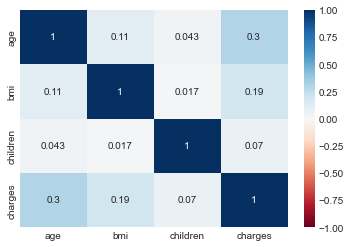

In [385]:
with plt.style.context(seaborn):    
    sns.heatmap(
        insurance_data.corr(), 
        cmap=corrMatrix, 
        vmin=-1, 
        vmax=1, 
        annot=True) 
        
    plt.show();

Expand correlation matrix with dummy

#### Dummy

In [386]:
dummy_df = pd.get_dummies(data=insurance_data, columns=['sex', 'smoker', 'region', 'children'])

dummy_df

,age,bmi,charges,bmi_status,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,overweight,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,18,33.770,1725.55230,obesity,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,28,33.000,4449.46200,obesity,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,33,22.705,21984.47061,healthy weight,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,32,28.880,3866.85520,overweight,0,1,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,obesity,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,obesity,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1335,18,36.850,1629.83350,obesity,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1336,21,25.800,2007.94500,overweight,1,0,1,0,0,0,0,1,1,0,0,0,0,0


In [387]:
bmiM25 = []
for index, row in dummy_df.iterrows():
    if row.bmi > 25:
        bmiM25.append(1)
    elif row.bmi <= 25:
        bmiM25.append(0)

bmiL25 = []
for index1, row1 in dummy_df.iterrows():
    if row1.bmi < 25:
        bmiL25.append(1)
    elif row.bmi >= 25:
        bmiL25.append(0)

In [388]:
dummy_df['bmi_m25'] = pd.Series(bmiM25)
dummy_df['bmi_l25'] = pd.Series(bmiL25)
dummy_df.head()

,age,bmi,charges,bmi_status,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,bmi_m25,bmi_l25
0,19,27.900,16884.92400,overweight,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1.0,0.0
1,18,33.770,1725.55230,obesity,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1.0,0.0
2,28,33.000,4449.46200,obesity,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1.0,0.0
3,33,22.705,21984.47061,healthy weight,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0.0,1.0
4,32,28.880,3866.85520,overweight,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1.0,0.0


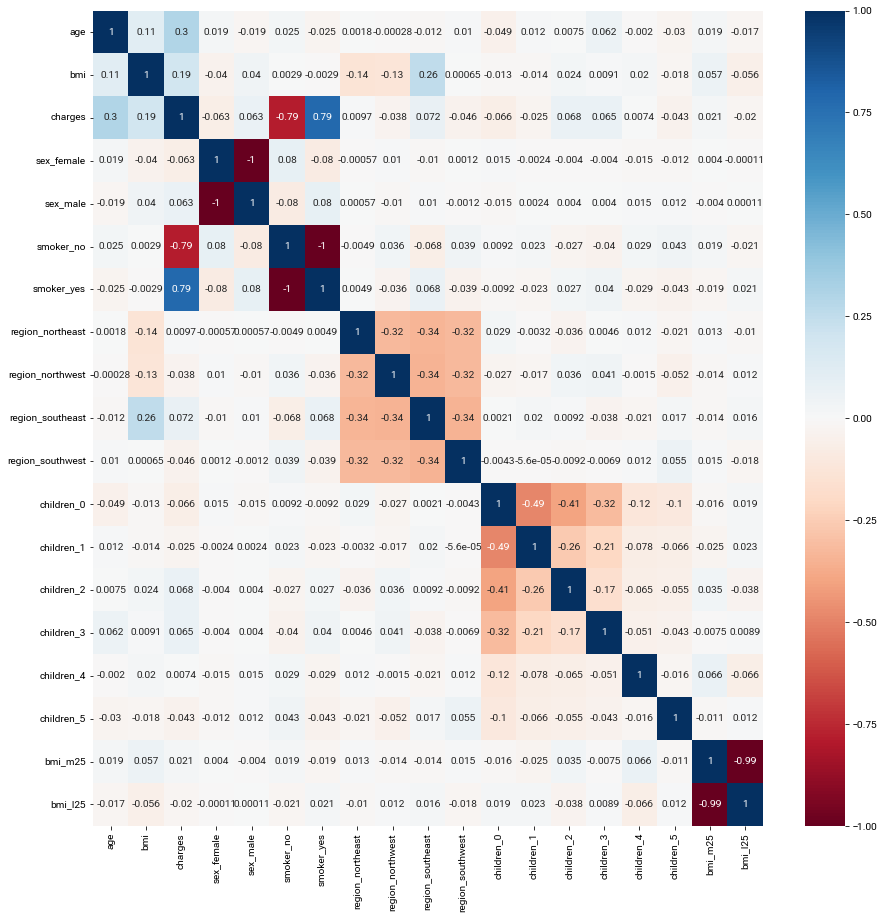

In [389]:
# plot correlation
plt.subplots(figsize=(15, 15))
sns.heatmap(
    dummy_df.corr(), 
    cmap=corrMatrix, 
    vmin=-1, 
    vmax=1, 
    annot=True) 
    
plt.show();

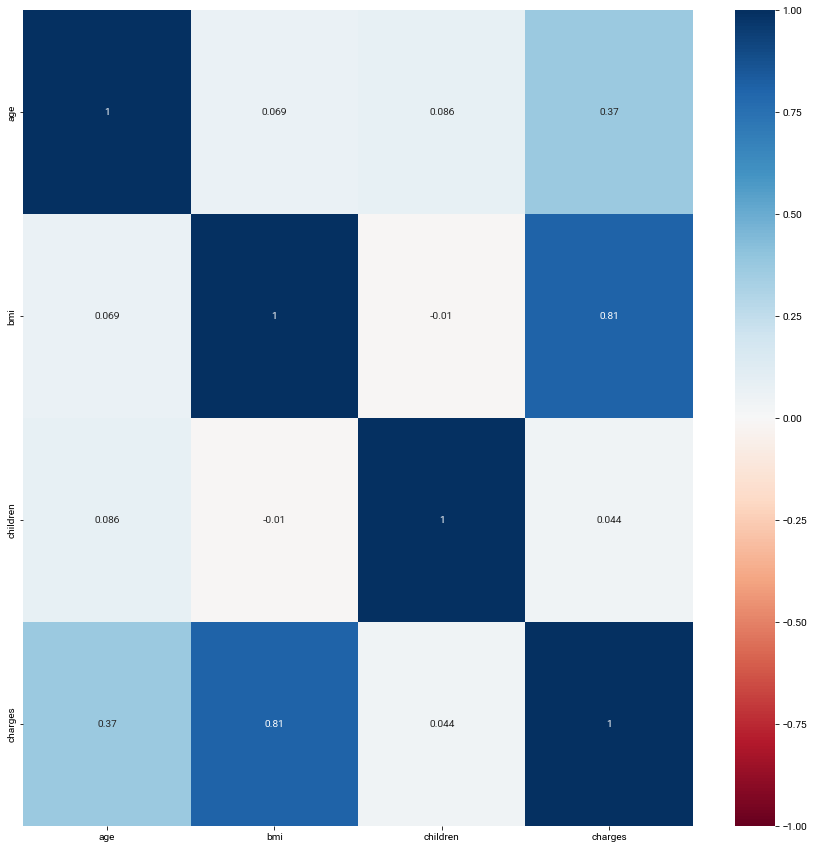

In [390]:
# plot correlation of smokers
plt.subplots(figsize=(15, 15))
sns.heatmap(
    (insurance_data.loc[insurance_data['smoker'] == 'yes']).corr(), 
    cmap=corrMatrix, 
    vmin=-1, 
    vmax=1, 
    annot=True) 
    
plt.show();

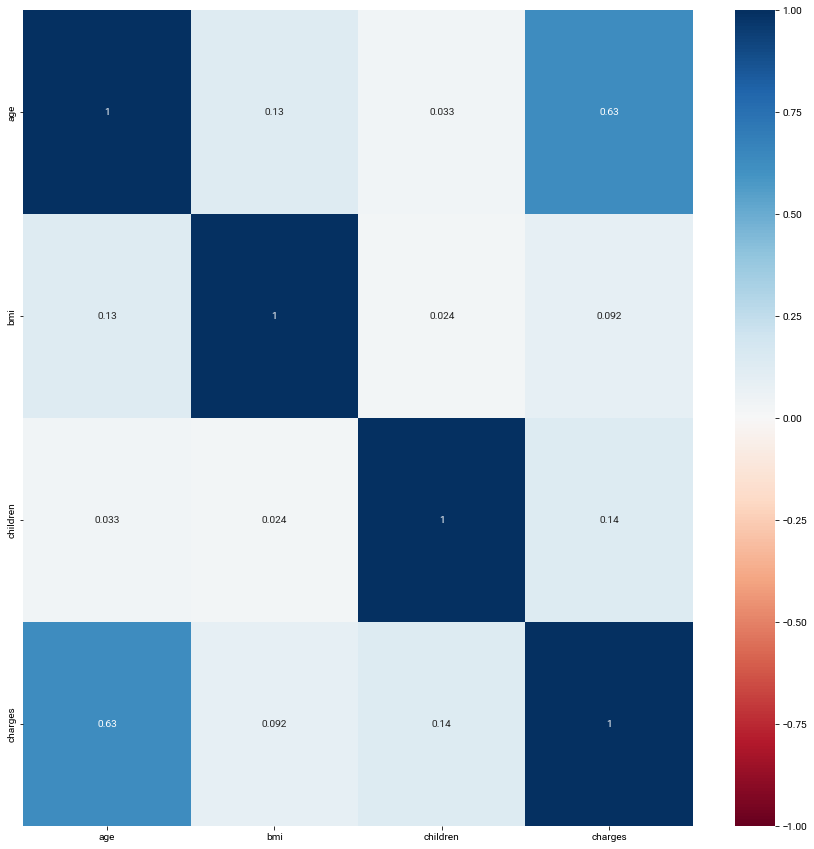

In [391]:
# plot correlation for non smoker
plt.subplots(figsize=(15, 15))
sns.heatmap(
    (insurance_data.loc[insurance_data['smoker'] == 'no']).corr(), 
    cmap=corrMatrix, 
    vmin=-1, 
    vmax=1, 
    annot=True) 
    
plt.show();

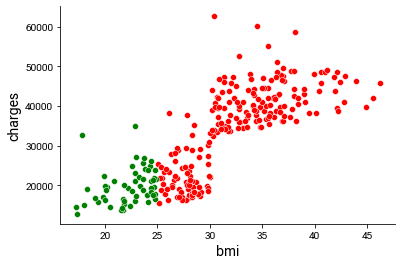

In [392]:
# smoker with bmi > 25 vs < 25
huhu = insurance_data.loc[insurance_data['smoker'] == 'yes']
sm = huhu.loc[huhu['bmi']>25]
nm = huhu.loc[huhu['bmi']<25]

sns.scatterplot(
    x=sm['bmi'],
    y=sm['charges'],
    color='red'
);
sns.scatterplot(
    x=nm['bmi'],
    y=nm['charges'],
    color='green'
);

In [393]:
# smoker correlation
sm.corr()

,age,bmi,children,charges
age,1.000000,0.034184,0.098456,0.395382
bmi,0.034184,1.000000,0.060872,0.741527
children,0.098456,0.060872,1.000000,0.095071
charges,0.395382,0.741527,0.095071,1.000000


Conclusion: Male smoker are likely to have higher rates of health charges. Non-smoker have negative correlation which means they are likely to have lower rates of health charges. BMI does not have a high correlation relationship with charges

### Hypothesis Testing

#### Hypothesis 1: Charges of smokers are higher compared to those who not

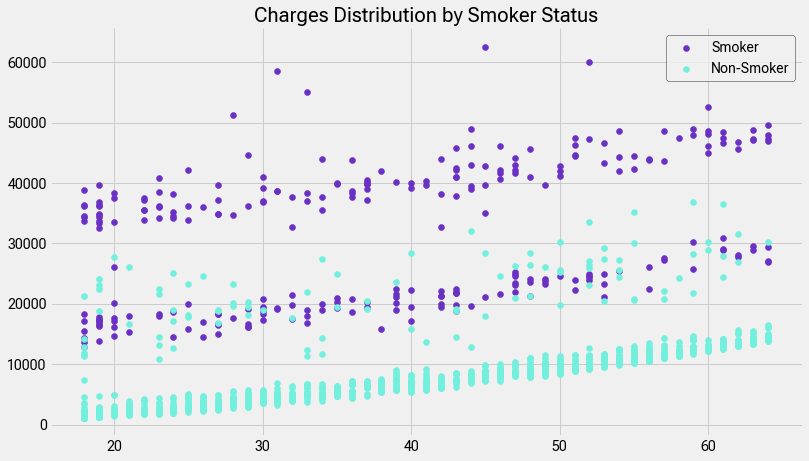

In [394]:
with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))
    
    ax.scatter(
        smoker['age'], 
        smoker['charges'], 
        label='Smoker', 
        c=smoker_cat)
    ax.scatter(
        no_smoker['age'], 
        no_smoker['charges'], 
        label='Non-Smoker', 
        c=nosmoker_cat)
    
    ax.legend(edgecolor='black', fontsize=14)
    ax.set_title("Charges Distribution by Smoker Status")

    plt.show();

In [395]:
# T-test
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(insurance_data[insurance_data.smoker == 'yes'].charges) 
y = np.array(insurance_data[insurance_data.smoker == 'no'].charges)

# independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)

Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.
p-value: 0.00000000


Conclusion: Smokers pay higher charges compared to non-smokers

#### Hypothesis 2: Charges of those with BMI > 25 are higher than those with BMI < 25

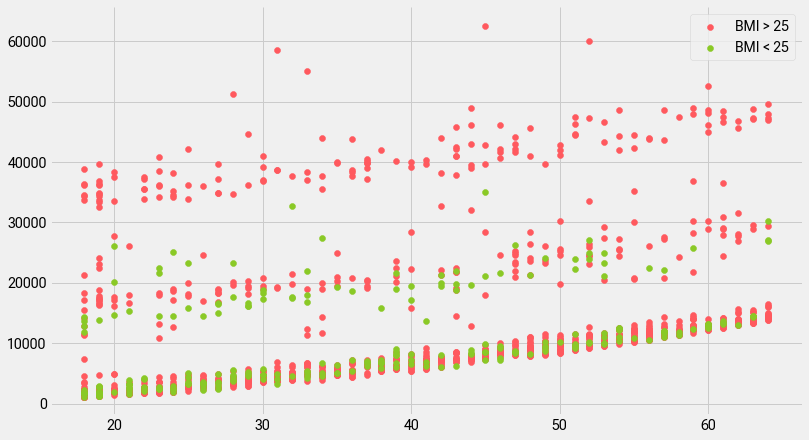

In [396]:
with plt.style.context(mpl):
    fig, ax = plt.subplots(figsize=(12, 7))
    hypo2_bmi_m25 = (insurance_data[bmi_m25])
    hypo2_bmi_l25 = (insurance_data[bmi_l25])

    ax.scatter(
        hypo2_bmi_m25['age'], 
        hypo2_bmi_m25['charges'], 
        label='BMI > 25', 
        c=bmiM25_cat)
    ax.scatter(
        hypo2_bmi_l25['age'], 
        hypo2_bmi_l25['charges'], 
        label='BMI < 25', 
        c=bmiL25_cat)
        
    ax.legend()

    plt.show();

In [397]:
Ho_2 = "Charges of those with BMI > 25 and BMI < 25 are the same"   
Ha_2 = "Charges of those with BMI > 25 and BMI < 25 are not the same"

x = np.array(dummy_df[dummy_df.bmi_m25 == 1].charges) 
y = np.array(dummy_df[dummy_df.bmi_l25 == 1].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)

Fail to Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.
p-value: 0.46834363


Conclusion: Those with BMI > 25 pay higher than those with BMI < 25

#### Hypothesis 3: Male and Female BMI's does not differ significantly

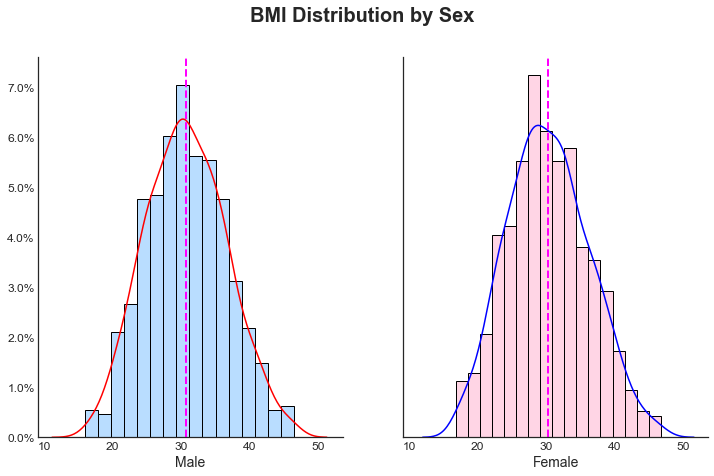

In [398]:
with plt.style.context(seaborn):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharex=True, sharey=True)
    sns.histplot(
        ax=ax1, 
        data=male1, 
        x='bmi',
        color=male_cat,
        stat='density',
        label='Male')
    sns.kdeplot(
        ax=ax1,
        data=male1,
        x='bmi',
        color='red')
    sns.histplot(
        ax=ax2, 
        data=female1, 
        x='bmi',
        color=female_cat,
        stat='density',
        label='Female')
    sns.kdeplot(
        ax=ax2,
        data=female1,
        x='bmi',
        color='blue')

    ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax1.set_xlabel('Male')
    ax2.set_xlabel('Female')

    ax1.axvline(male1['bmi'].mean(), linestyle='--', linewidth=2, c='magenta')
    ax2.axvline(female1['bmi'].mean(), linestyle='--', linewidth=2, c='magenta')

    ax1.yaxis.set_tick_params(labelsize=12)
    ax1.xaxis.set_tick_params(labelsize=12)
    ax2.xaxis.set_tick_params(labelsize=12)
    ax1.set(ylabel=None)

    plt.suptitle('BMI Distribution by Sex')
    
    plt.show();

In [399]:
Ho_3 = "BMI of Male and Female does not differ significantly"   
Ha_3 = "BMI of Male and Female does differ significantly"

x = np.array(insurance_data[insurance_data.sex == 'male'].bmi) 
y = np.array(insurance_data[insurance_data.sex == 'female'].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)

Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.
p-value: 0.14542176


Conclusion: BMI does not differ significantly between male and female